In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [3]:
def inversion_2_norm(N):
    r_inverse_cdf = lambda y: math.sqrt(y)
    theta_inverse_cdf = lambda y: 2 * y * math.pi
    polars = [(r_inverse_cdf(np.random.uniform(0,1,1)[0]), theta_inverse_cdf(np.random.uniform(0,1,1)[0])) for i in range(N)]
    coords = [(r*math.cos(theta), r*math.sin(theta)) for (r, theta) in polars]
    return coords

def sample_p_norm(p, N):
    if p == 2:
        return inversion_2_norm(N)
    else:
        reject = lambda x1, x2: ((math.fabs(x1)**p) + (math.fabs(x2)**p))**(1/p) > 1
        coords = [(x1, x2) for (x1, x2) in inversion_2_norm(N) if not reject(x1, x2)]
        rejected = 1 - len(coords)/float(N)
        return coords, rejected



Of 5000 points generated for 2-norm ball
p        rejection_rate
-------------------------
1.50     0.14
0.70     0.60


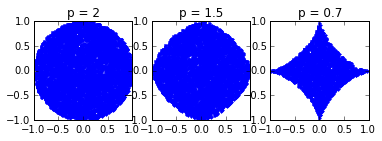

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)
ax3.set_aspect(1.0)

N = 5000
coords1 = sample_p_norm(2, N)
ax1.plot(np.array([c[0] for c in coords1]), np.array([c[1] for c in coords1]), '.')
ax1.set_title('p = 2')

coords2, rejected1  = sample_p_norm(1.5, N)
ax2.plot(np.array([c[0] for c in coords2]), np.array([c[1] for c in coords2]), '.')
ax2.set_title('p = 1.5')

coords3, rejected2 = sample_p_norm(0.7, N)
ax3.plot(np.array([c[0] for c in coords3]), np.array([c[1] for c in coords3]), '.')
ax3.set_title('p = 0.7')

norms = [1.5, 0.7]
rates = [rejected1, rejected2]

print "Of {0} points generated for 2-norm ball".format(N)
print "{0}{1}{2}".format("p".ljust(4), " "*5, "rejection_rate")
print "-"*25

for (p, r) in zip(norms, rates):
    print "{0:.2f}{1}{2:.2f}".format(p, " "*5, r)
    
